# SUMMER ANALYTICS 2024

## WEEK-4 ASSIGNMENT

In [222]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Let's explore the dataset shall we?**

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maintenance cost, doors, persons, lug_boot, safety.
In this notebook we will go through an in depth analysis of sound and how we can classify and ultimately understand it.

I suggest you to use the internet before asking a doubt. Most of your doubts will disappear once you read the documentation or search StackOverflow!

Note: Pay close attention to the markdown cells and the comments.

In [223]:
# Read the csv file as data
# data = pd.read_csv('car_evaluation.csv', header=None)
data = pd.read_csv('car_evaluation.csv')
data.head()


vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

Attribute Information->

Class Values: unacc, acc, good, vgood

Attributes->
buying- vhigh, high, med, low.
maint- vhigh, high, med, low.
doors -2, 3, 4, 5more.
persons-2, 4, more.
lug_boot- small, med, big.
safety- low, med, high.

In [224]:
data.describe()

vhigh vhigh.1     2   2.1 small   low  unacc
count   1727    1727  1727  1727  1727  1727   1727
unique     4       4     4     3     3     3      4
top     high    high     3     4   med   med  unacc
freq     432     432   432   576   576   576   1209

In [225]:
# view dimensions of dataset
data.shape

(1727, 7)

We can see that there are 1727 instances and 7 variables in the data set.



**Rename column names**
We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [226]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

Frequency distribution of values in variables
Now, I will check the frequency counts of categorical variable

In [227]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(data[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

Summary of variables:
There are 7 variables in the dataset. All the variables are of categorical data type.
These are given by buying, maint, doors, persons, lug_boot, safety and class.
class is the target variable.

In [228]:
# check missing values in variables
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

**Declare feature vector and target variable**

In [229]:
x = data.drop(['class'], axis=1)
y = data['class']

**Split data into separate training and test set**

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [231]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (570, 6))

Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [232]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

Encode categorical variables
Now, I will encode the categorical variables.

In [233]:
X_train.head()

buying  maint  doors persons lug_boot safety
83    vhigh  vhigh  5more       2      med    low
48    vhigh  vhigh      3    more      med    med
468    high  vhigh      3       4    small    med
155   vhigh   high      3    more      med    low
1043    med   high      4    more    small    low

We can see that all the variables are ordinal categorical data type.



In [234]:
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [235]:
X_train.head()

buying  maint  doors  persons  lug_boot  safety
83         3      3      3        0         1       1
48         3      3      1        2         1       2
468        0      3      1        1         2       2
155        3      0      1        2         1       1
1043       2      0      2        2         2       1

Encode y_train and y_test similarly.(You might have to convert the Series object to a 1D array first.)

In [236]:
# Encode y_train and y_test similarly.(You might have to convert the Series object to a 1D array first.)
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

Now let's perform Machine Learning Classification. We'll be predicting the genre based on the given features.

In [237]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE

Creating a Predefined function to assess the accuracy of a model. This will be the scoring function

In [238]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    # print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 2)
    print('Accuracy for', title, ':', accuracy, '\n')

 Let's see how a basic Logistic Regressor works on this!

In [239]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

Accuracy for Logistic Regression : 0.7 



**Now it's your turn. Train the following:**

4. **AdaBoostClassifier** with n_estimators=1000 & random_state=0
5. **RandomForestClassifier** with n_estimators=1000, max_depth=10, random_state=0

**IMPORTANT**: Use the default values for other hyper parameters apart from these. Do **NOT** change these values

In [258]:
# AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
score(ada, "AdaBoostClassifier")

Accuracy for AdaBoostClassifier : 0.78 



In [257]:
# Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
score(rf, "Random Forest")

Accuracy for Random Forest : 0.95 



AdaBoost performs poorly, but Random Forest looks great!

Now look at the import statements. There may be a few models you may or may not have seen. Use those models to beat the score you achieved in the cell above! Play around with their hyper parameters.
We suggest going through their documentations before using them.

In [242]:
# Naive Bayes: GaussianNB
gnb = GaussianNB()
score(gnb, "Naive Bayes")

# KNN: KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
score(knn, "KNN")

# Decission trees: DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
score(dt, "Decission trees")

Accuracy for Naive Bayes : 0.61 

Accuracy for KNN : 0.85 

Accuracy for Decission trees : 0.98 



Visualize decision-trees

[Text(0.5413851351351351, 0.9642857142857143, 'x[3] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.5278716216216216, 0.8928571428571429, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.5346283783783783, 0.9285714285714286, 'True  '),
 Text(0.5548986486486487, 0.8928571428571429, 'x[5] <= 0.5\ngini = 0.576\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.5481418918918919, 0.9285714285714286, '  False'),
 Text(0.27407094594594594, 0.8214285714285714, 'x[0] <= 2.5\ngini = 0.626\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.15625, 0.75, 'x[0] <= 0.5\ngini = 0.615\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.05405405405405406, 0.6785714285714286, 'x[1] <= 2.5\ngini = 0.404\nsamples = 64\nvalue = [46, 0, 18, 0]'),
 Text(0.04054054054054054, 0.6071428571428571, 'x[2] <= 0.5\ngini = 0.115\nsamples = 49\nvalue = [46, 0, 3, 0]'),
 Text(0.02702702702702703, 0.5357142857142857, 'x[4] <= 1.5\ngini = 0.32\nsamples = 15\nvalue = [12, 0, 3

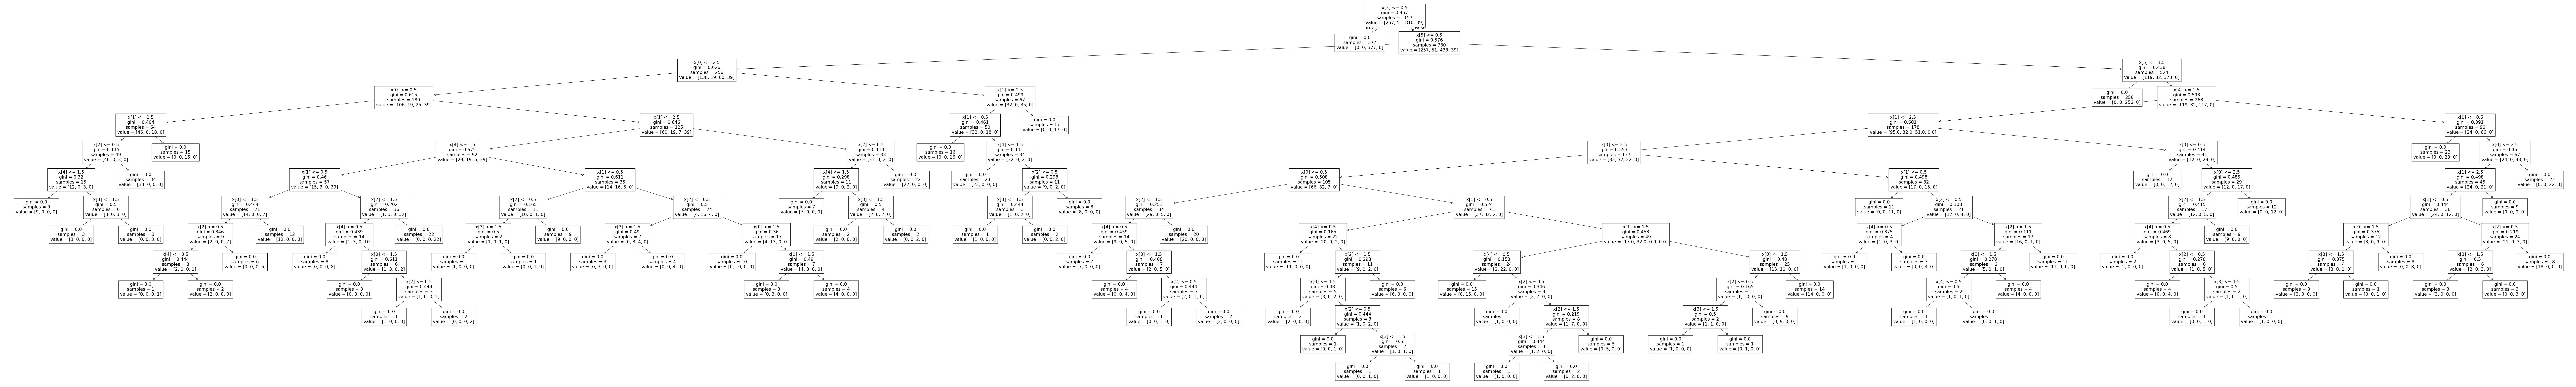

In [243]:
from sklearn import tree

plt.figure(figsize=(200,30))
tree.plot_tree(dt)

Decision Tree Classifier with criterion gini index,max_depth=10, random_state=0

Accuracy for Decision Tree : 0.96 



[Text(0.5491727941176471, 0.9545454545454546, 'x[3] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.5344669117647058, 0.8636363636363636, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.5418198529411764, 0.9090909090909092, 'True  '),
 Text(0.5638786764705882, 0.8636363636363636, 'x[5] <= 0.5\ngini = 0.576\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.5565257352941176, 0.9090909090909092, '  False'),
 Text(0.29825367647058826, 0.7727272727272727, 'x[0] <= 2.5\ngini = 0.626\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.17003676470588236, 0.6818181818181818, 'x[0] <= 0.5\ngini = 0.615\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.058823529411764705, 0.5909090909090909, 'x[1] <= 2.5\ngini = 0.404\nsamples = 64\nvalue = [46, 0, 18, 0]'),
 Text(0.04411764705882353, 0.5, 'x[2] <= 0.5\ngini = 0.115\nsamples = 49\nvalue = [46, 0, 3, 0]'),
 Text(0.029411764705882353, 0.4090909090909091, 'x[4] <= 1.5\ngini = 0.32\nsamples = 15\nvalu

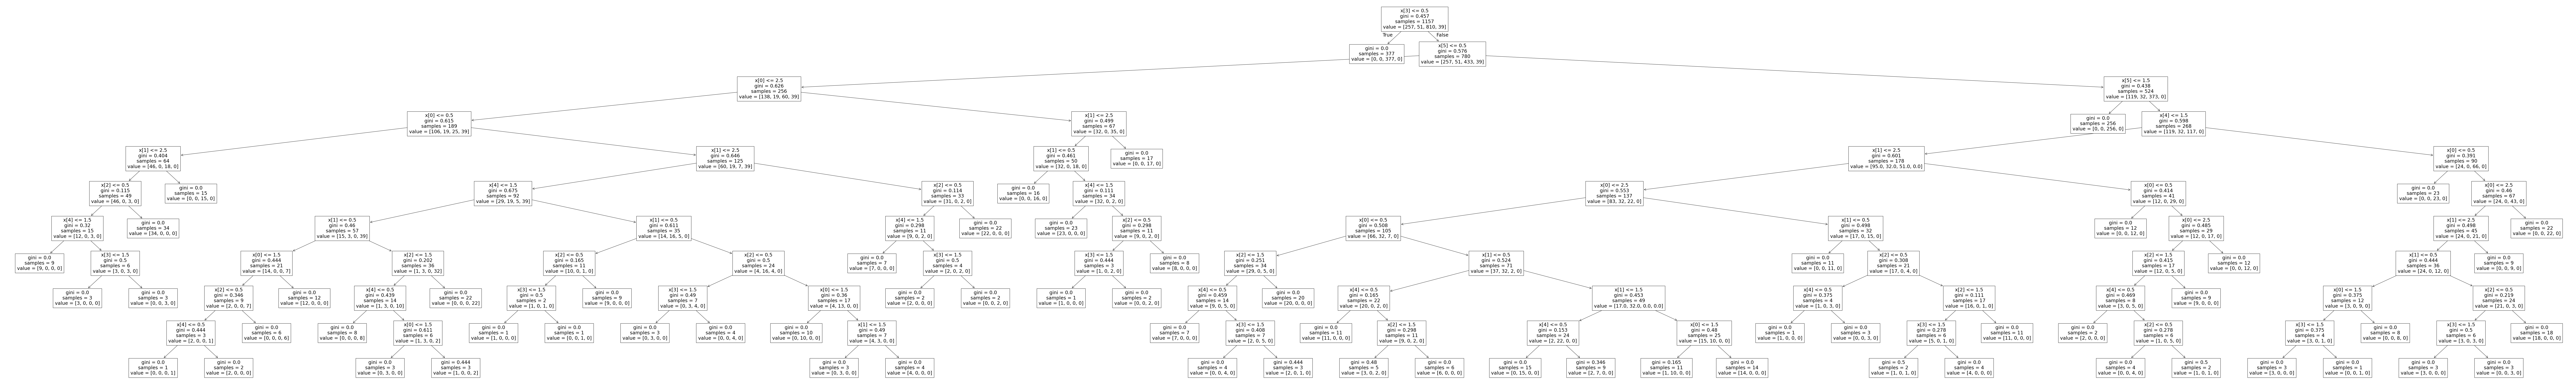

In [244]:
dt1 = DecisionTreeClassifier(max_depth=10, random_state=0, criterion='gini')
score(dt1, "Decision Tree")

plt.figure(figsize=(200,30))
tree.plot_tree(dt1)

Decision Tree Classifier with criterion entripy index,max_depth=8, random_state=0

Accuracy for Decision Tree : 0.93 



[Text(0.5676020408163265, 0.9444444444444444, 'x[3] <= 0.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.5471938775510204, 0.8333333333333334, 'entropy = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.5573979591836735, 0.8888888888888888, 'True  '),
 Text(0.5880102040816326, 0.8333333333333334, 'x[5] <= 0.5\nentropy = 1.472\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.5778061224489796, 0.8888888888888888, '  False'),
 Text(0.3469387755102041, 0.7222222222222222, 'x[0] <= 2.5\nentropy = 1.663\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.1836734693877551, 0.6111111111111112, 'x[0] <= 0.5\nentropy = 1.657\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.08163265306122448, 0.5, 'x[1] <= 2.5\nentropy = 0.857\nsamples = 64\nvalue = [46, 0, 18, 0]'),
 Text(0.061224489795918366, 0.3888888888888889, 'x[2] <= 0.5\nentropy = 0.332\nsamples = 49\nvalue = [46, 0, 3, 0]'),
 Text(0.04081632653061224, 0.2777777777777778, 'x[4] <= 1.5\nentropy = 0.7

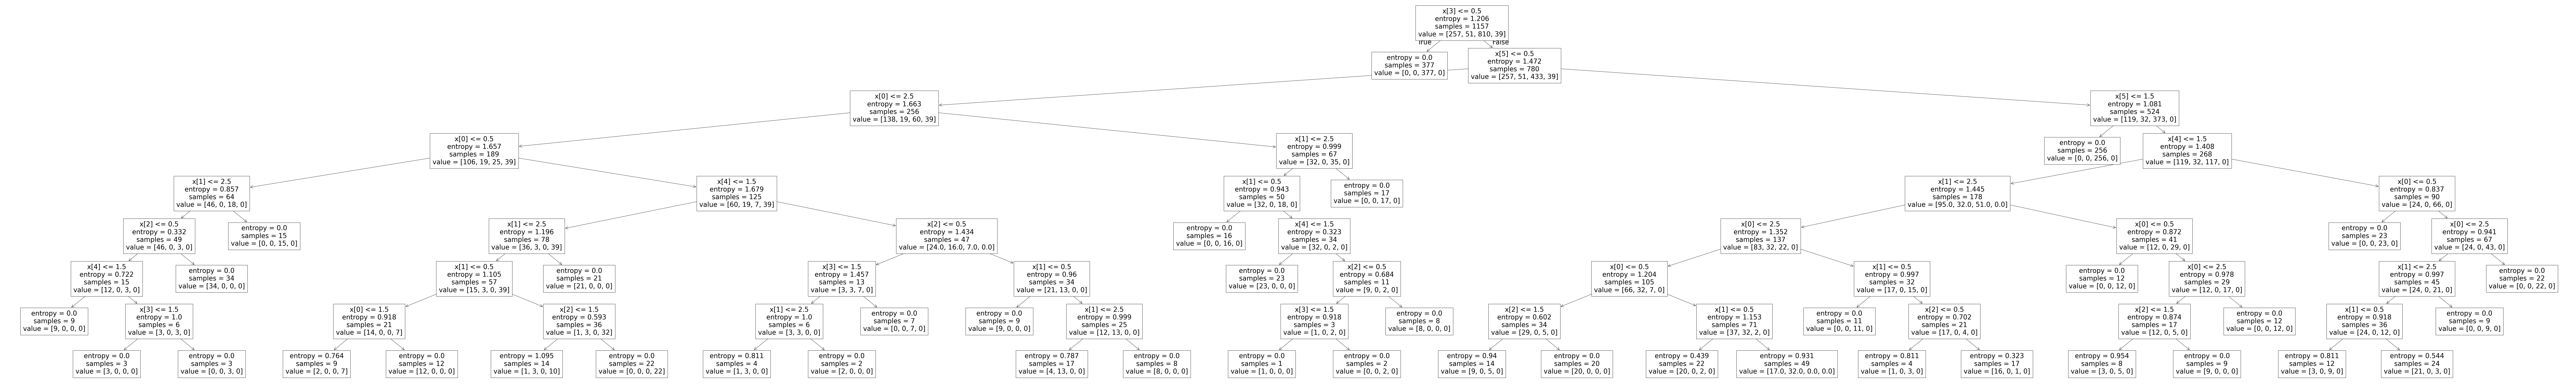

In [245]:
dt2 = DecisionTreeClassifier(max_depth=8, random_state=0, criterion='entropy')
score(dt2, "Decision Tree")

plt.figure(figsize=(200,30))
tree.plot_tree(dt2)

Use XGBClassifier with n_estimators=1000 and learning_rate=0.01

In [259]:
# XGBClassifier
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.01)
score(xgb, "XGBClassifier")

Accuracy for XGBClassifier : 0.98 



Visualize XGBClassifier

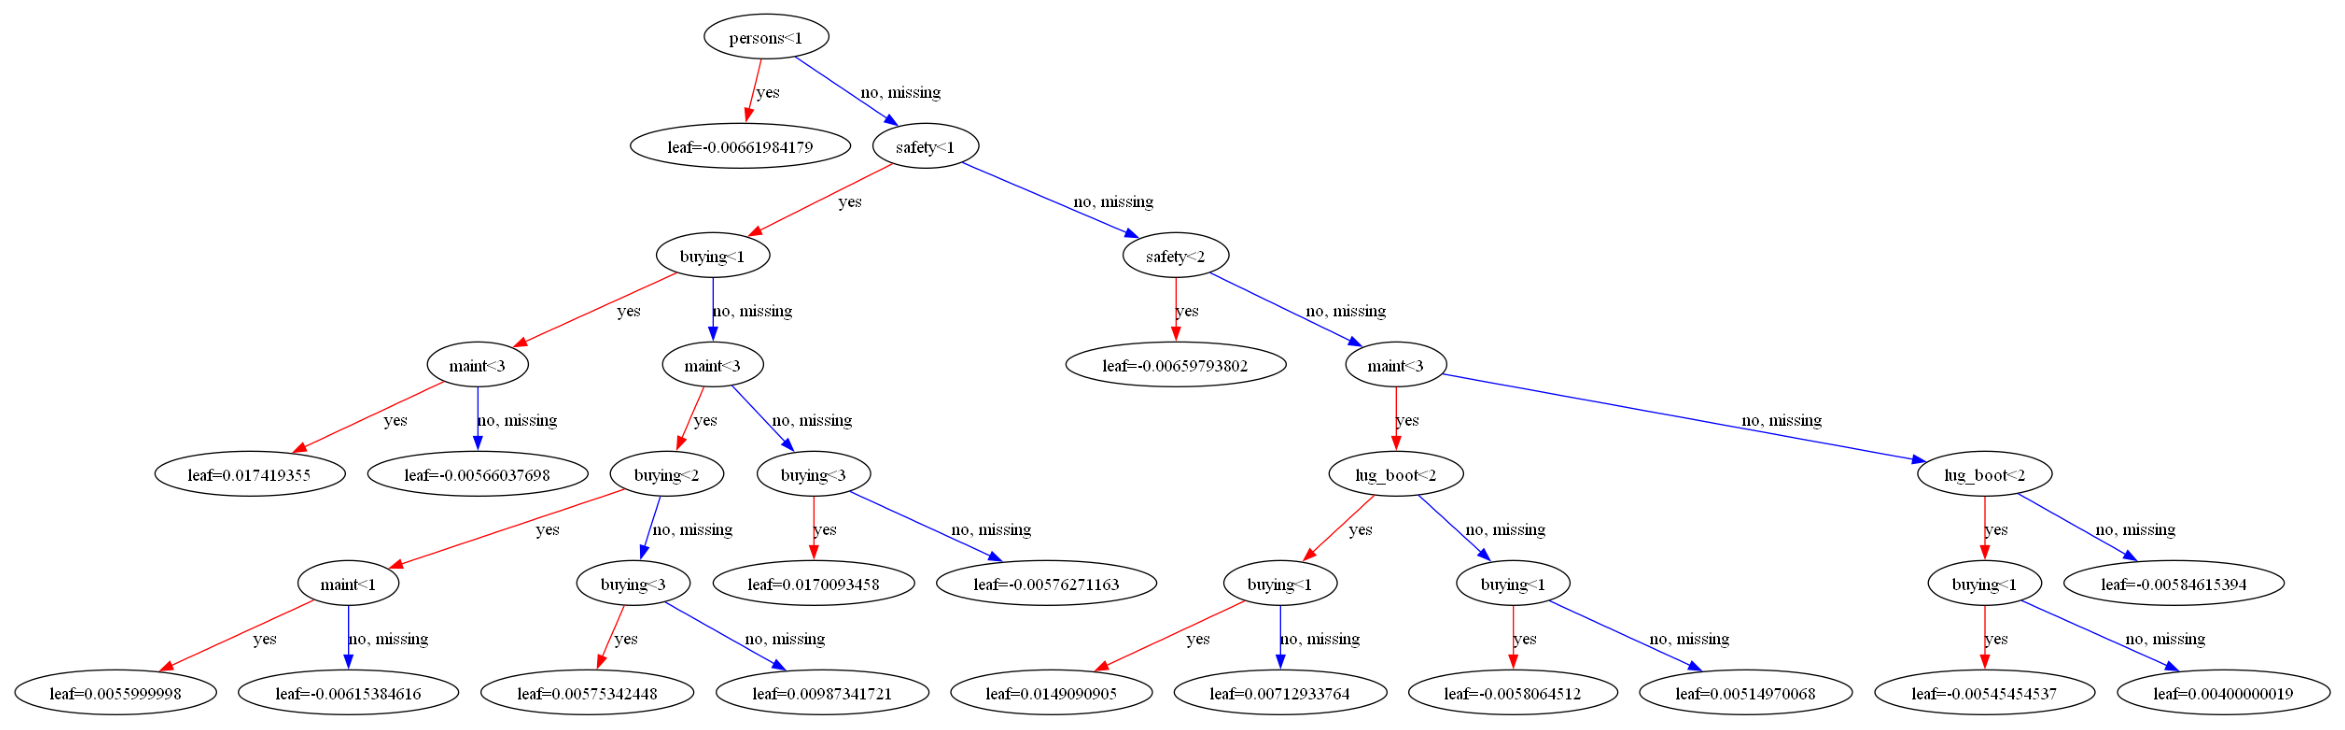

In [256]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb, ax=ax)
plt.show()

Now, heres a task for you. Try XGBRFClassifier on your own.

Accuracy for XGBRFClassifier : 0.91 



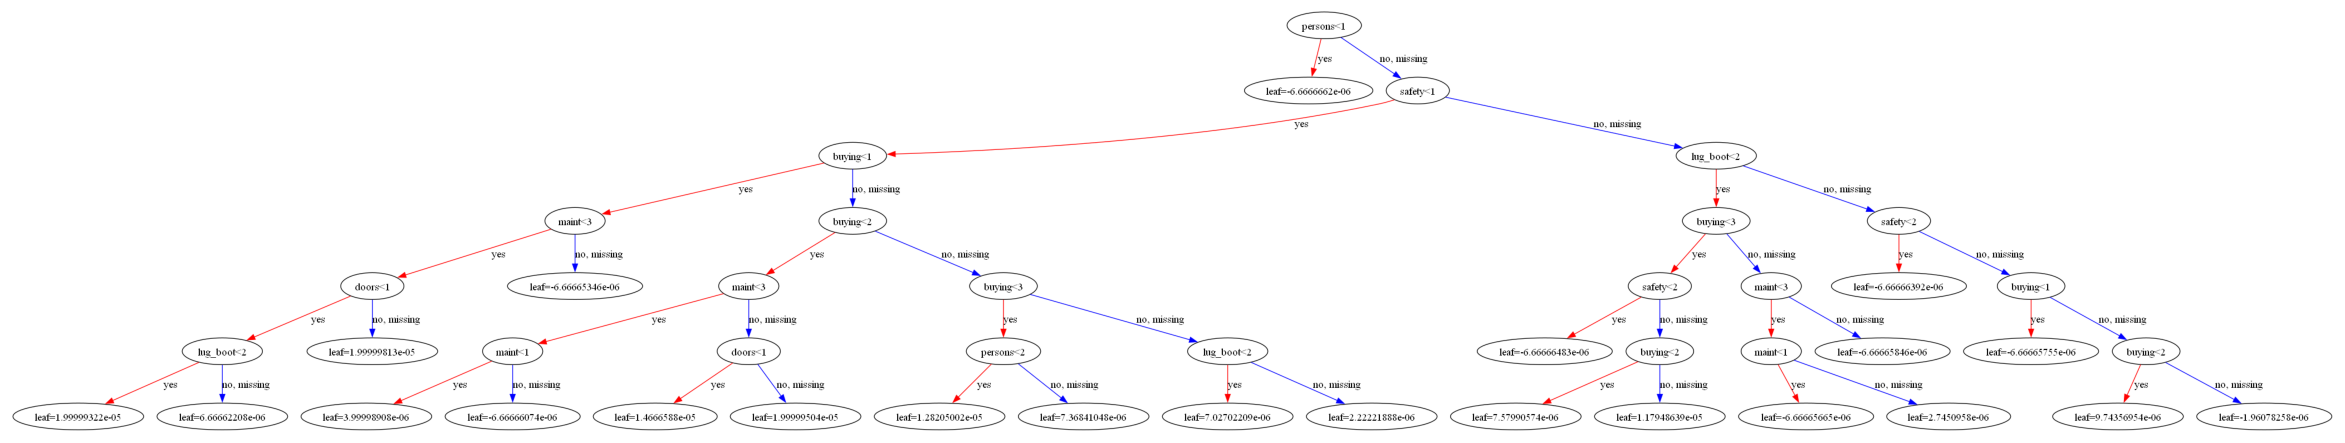

In [248]:
# XGBRFClassifier
xgbrf = XGBRFClassifier(n_estimators=1000, learning_rate=0.01)
score(xgbrf, "XGBRFClassifier")

fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgbrf, ax=ax)
plt.show()

Plot the Confusion Matrix for XGBClassifier with parameters n_estimators=1000, learning_rate=0.1

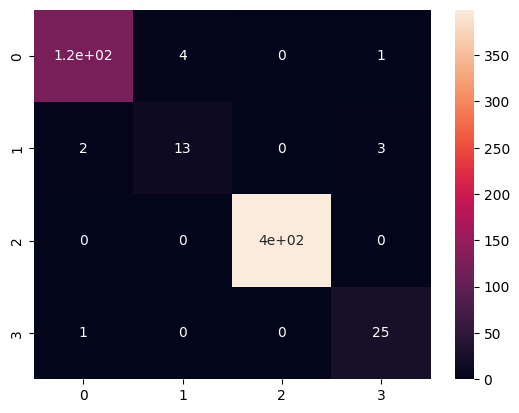

In [249]:
cm = confusion_matrix(y_test, xgb.predict(X_test))
sns.heatmap(cm, annot=True)
plt.show()

8. Find the feature importance for XGBClassifier.

*Hint: It's an inbuilt member variable*

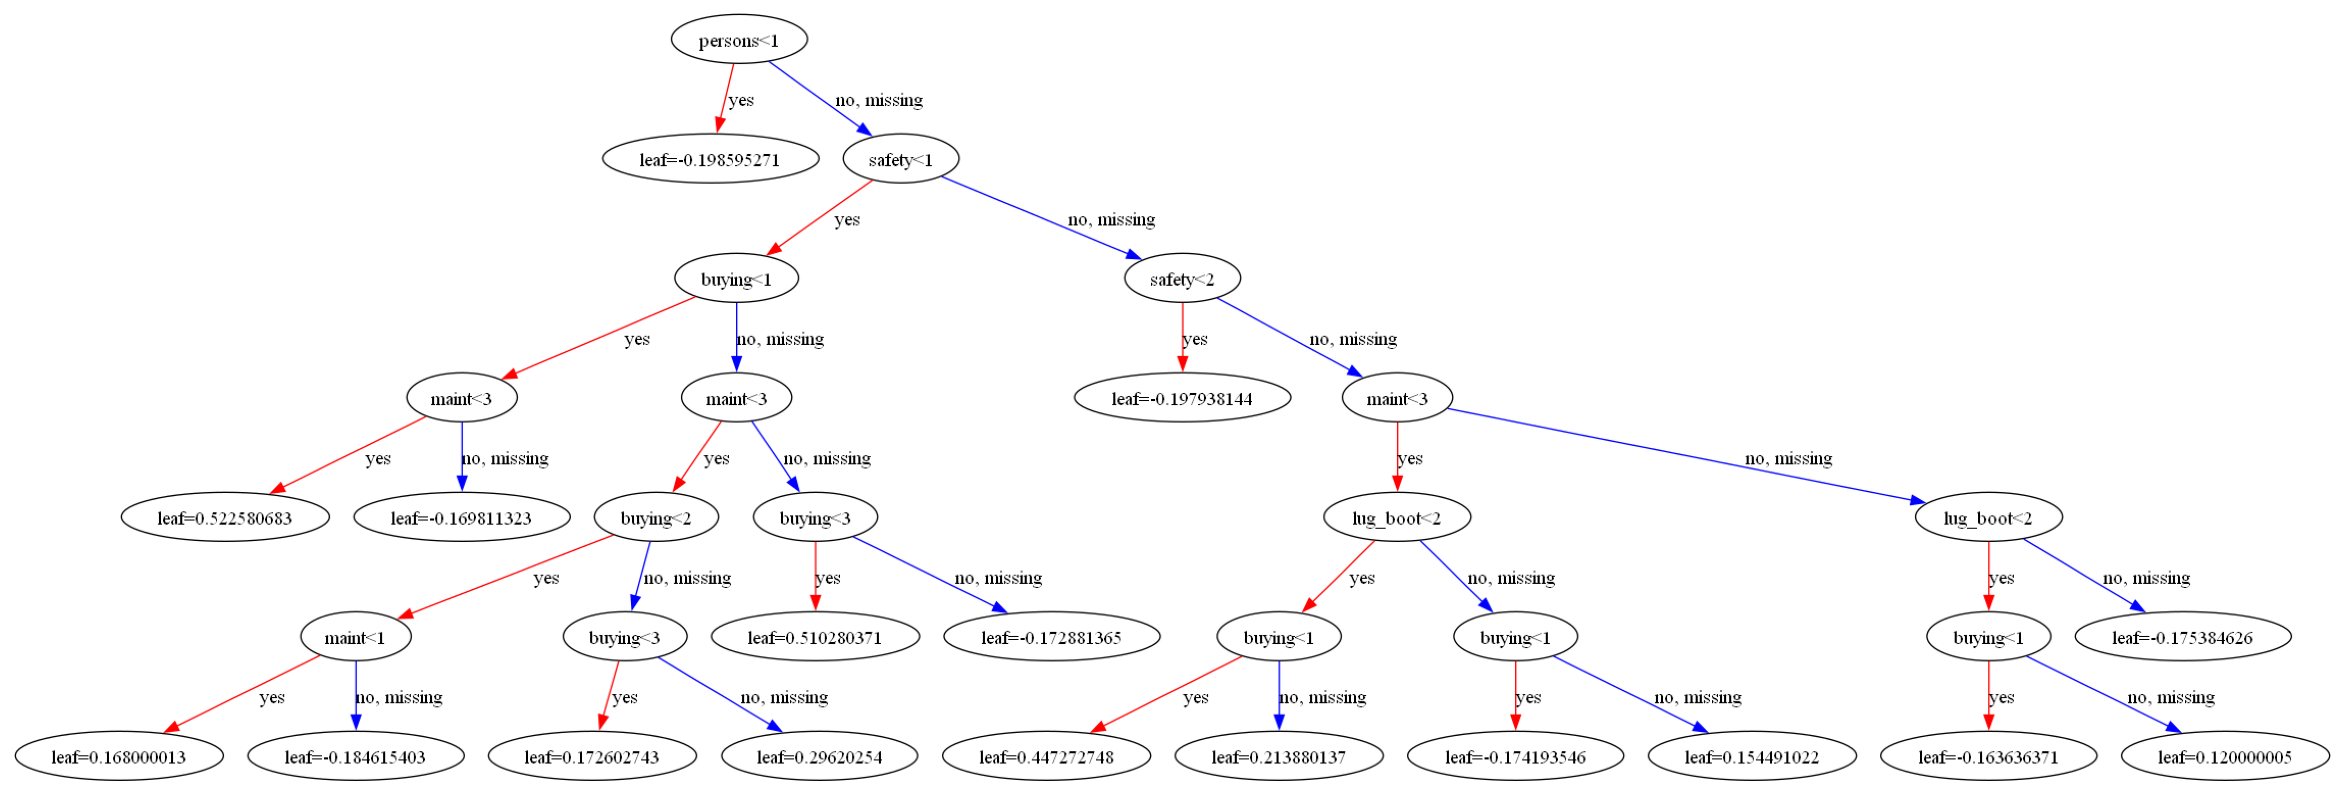

In [250]:
tmp = XGBClassifier()
tmp.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(tmp, ax=ax)
plt.show()

Accuracy for XGBRFClassifier : 0.91 



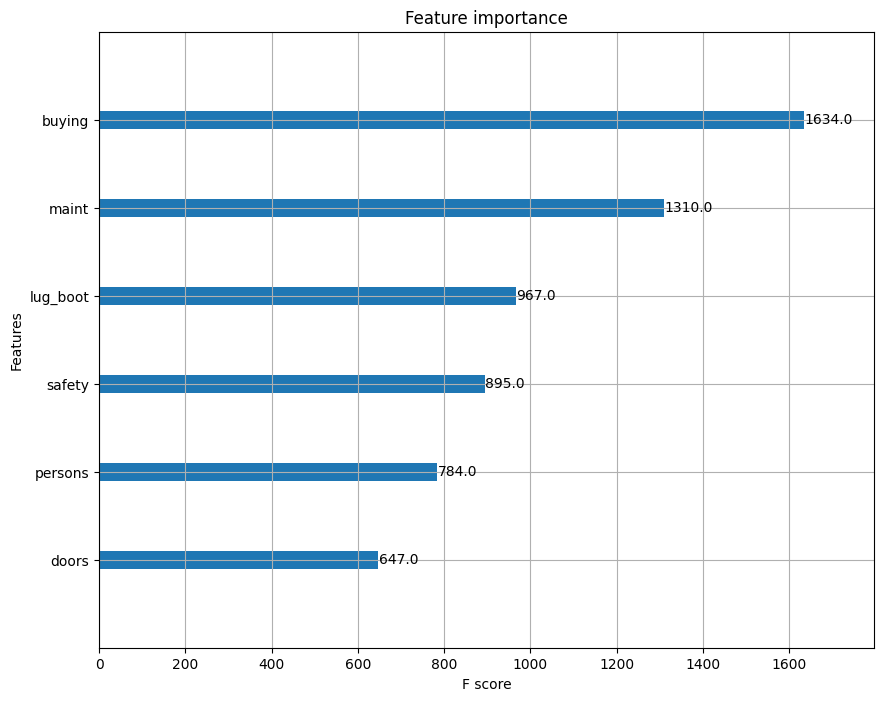

In [264]:
tmp = XGBRFClassifier()
score(tmp, "XGBRFClassifier")
fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(tmp, ax=ax)
plt.show()

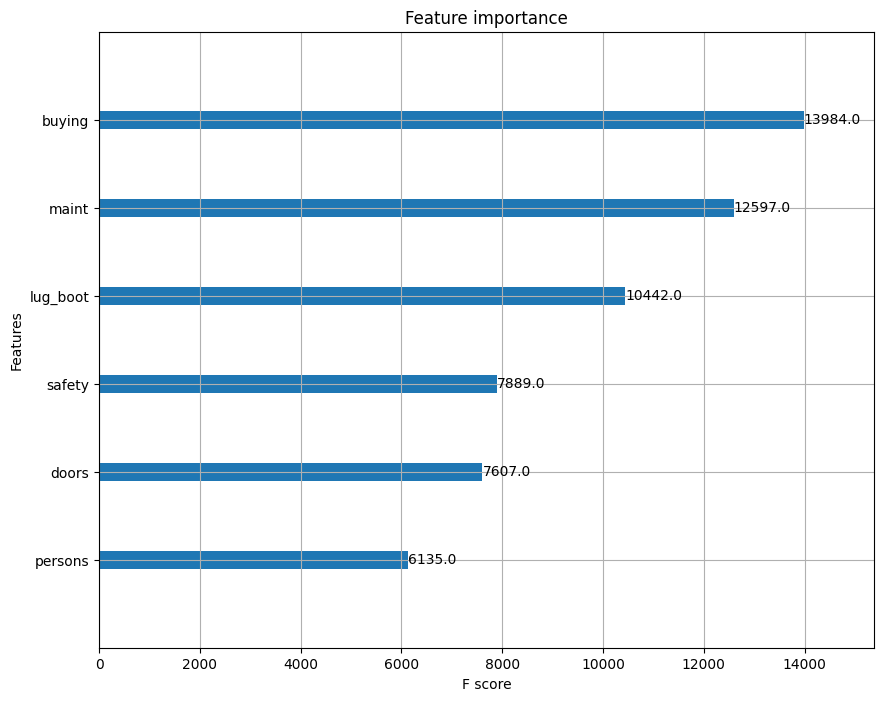

In [251]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb, ax=ax)
plt.show()

**Classification Report**
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification for XGBClassifierwith parameters n_estimators=1000, learning_rate=0.1

In [252]:
model = XGBClassifier(n_estimators=1000, learning_rate=0.1)
model.fit(X_train, y_train)

from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       127
           1       0.82      0.78      0.80        18
           2       1.00      1.00      1.00       399
           3       0.93      0.96      0.94        26

    accuracy                           0.98       570
   macro avg       0.93      0.93      0.93       570
weighted avg       0.98      0.98      0.98       570

